# **EDA Notebook**



---
## 0. Setup Environment

### 0.a Install Mandatory Packages

> Do not modify this code before running it

### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [1]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.d Import Packages

In [2]:

import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud, STOPWORDS


---
## A. Project Description


In [3]:
from IPython.display import display, HTML

def print_tile(size="h3", key=None, value=None):
    """
    Display a styled HTML tile in a Jupyter notebook.
    Args:
        size (str): HTML heading size (e.g., 'h1', 'h2', 'h3').
        key (str): Optional label for the tile.
        value (str): The value or content to display.
    """
    if key is not None:
        html = f"<div style='margin:10px 0;'><{size} style='display:inline; color:#2a4d69; margin-right:10px;'>{key}:</{size}><span style='font-size:1.2em; color:#4b86b4;'>{value}</span></div>"
    else:
        html = f"<div style='margin:10px 0;'><{size} style='color:#2a4d69;'>{value}</{size}></div>"
    display(HTML(html))

---
## B. Data Understanding

### B.1   Load Dataset

In [4]:
# Do not modify this code
try:
  df = pd.read_csv("../data/raw/customer_satisfaction.csv")
except Exception as e:
  print(e)

### B.2 Explore Dataset

> You can add more cells in this section

In [5]:
df.head()

,Unnamed: 0,customer_id,nps,cltv,reason
0,0,70f18737-5835-4639-be44-f1a8c6604490,4,2056,NaN
1,1,206e8726-2743-4739-8f2f-758e30256314,3,2916,NaN
2,2,40da1c87-0650-4378-b8d7-0a49cb21085c,4,5248,NaN
3,3,4e28bb69-cee2-4fdf-8831-28935bb5e9b6,3,4607,NaN
4,4,39c9339b-c22b-4bf2-8c73-deb7b6e02de1,4,3030,NaN


Popping the Unnamed: 0 column because it is an index column

In [6]:
df.pop('Unnamed: 0')

0            0
1            1
2            2
3            3
4            4
         ...  
15769    15769
15770    15770
15771    15771
15772    15772
15773    15773
Name: Unnamed: 0, Length: 15774, dtype: int64

In [7]:
df.head()

,customer_id,nps,cltv,reason
0,70f18737-5835-4639-be44-f1a8c6604490,4,2056,NaN
1,206e8726-2743-4739-8f2f-758e30256314,3,2916,NaN
2,40da1c87-0650-4378-b8d7-0a49cb21085c,4,5248,NaN
3,4e28bb69-cee2-4fdf-8831-28935bb5e9b6,3,4607,NaN
4,39c9339b-c22b-4bf2-8c73-deb7b6e02de1,4,3030,NaN


In [8]:
df.describe()

,nps,cltv
count,15774.000000,15774.000000
mean,3.249525,4386.955750
std,1.201393,1191.571121
min,1.000000,2003.000000
25%,3.000000,3424.000000
50%,3.000000,4539.000000
75%,4.000000,5362.750000
max,5.000000,6500.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15774 entries, 0 to 15773
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  15774 non-null  object
 1   nps          15774 non-null  int64 
 2   cltv         15774 non-null  int64 
 3   reason       4189 non-null   object
dtypes: int64(2), object(2)
memory usage: 493.1+ KB


In [10]:
df.nunique()

customer_id    7043
nps               5
cltv           3438
reason           20
dtype: int64

Now lets check for duplicates

In [11]:
df_duplicates = df[df.duplicated(subset=['customer_id'], keep=False)]

# Display duplicate rows
df_duplicates.head()# Sorting duplicate rows by 'customer_id' as an object (string)
df_duplicates_sorted = df_duplicates.sort_values(by='customer_id', key=lambda x: x.astype(str))

# Display the sorted duplicate rows
df_duplicates_sorted.head()

,customer_id,nps,cltv,reason
1557,000f51ad-8208-46f4-a213-6b83de3dded1,4,3733,NaN
3192,000f51ad-8208-46f4-a213-6b83de3dded1,4,3733,NaN
13235,000f51ad-8208-46f4-a213-6b83de3dded1,4,3733,NaN
8165,001a6be8-e23e-47e1-8384-18051f2d03b5,5,4152,NaN
8208,001a6be8-e23e-47e1-8384-18051f2d03b5,5,4152,NaN


The data seems to have duplicate values.

now lets have a better idea about numerical and categorical features

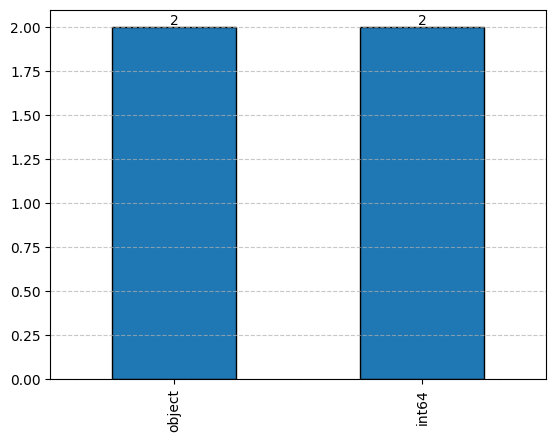

In [12]:
# visualizing the data types count
ax=df.dtypes.value_counts().plot(kind='bar',edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['nps', 'cltv'], dtype='object')

In [14]:

numerical_features=df[numerical_columns]
numerical_features.head()


,nps,cltv
0,4,2056
1,3,2916
2,4,5248
3,3,4607
4,4,3030


Checking for Null Value

In [15]:
numerical_features.isnull().sum()

nps     0
cltv    0
dtype: int64

We donot have any mising values

# Now lets look at the categorical features

In [16]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['customer_id', 'reason'], dtype='object')

In [17]:
categorical_features=df[categorical_columns]
categorical_features.head()

,customer_id,reason
0,70f18737-5835-4639-be44-f1a8c6604490,NaN
1,206e8726-2743-4739-8f2f-758e30256314,NaN
2,40da1c87-0650-4378-b8d7-0a49cb21085c,NaN
3,4e28bb69-cee2-4fdf-8831-28935bb5e9b6,NaN
4,39c9339b-c22b-4bf2-8c73-deb7b6e02de1,NaN


lets check for missing values

In [18]:
categorical_features.nunique()

customer_id    7043
reason           20
dtype: int64

In [19]:
categorical_features.isnull().sum()

customer_id        0
reason         11585
dtype: int64

we will deal with the null values later


In [20]:
categorical_features.reason.nunique()

20

In [21]:

dataset_insights = """ ####Index Column Adjustment

Identified the index column and removed the unnecessary Unnamed: 0 column to clean the dataset structure.

####Duplicate Values Detected

Checked for duplicates and found repeated values, which will be addressed in the cleaning phase.

####Missing Values Analysis

Examined all columns for missing values and discovered that only the reason column contains missing entries which will be addressed in the cleaning phase."""


In [22]:
# Do not modify this code
print_tile(size="h3", key='dataset_insights', value=dataset_insights)

### B.3 Explore Feature of Interest 1

> 'nps'

Customer’s overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied)

In [23]:
df.head()

,customer_id,nps,cltv,reason
0,70f18737-5835-4639-be44-f1a8c6604490,4,2056,NaN
1,206e8726-2743-4739-8f2f-758e30256314,3,2916,NaN
2,40da1c87-0650-4378-b8d7-0a49cb21085c,4,5248,NaN
3,4e28bb69-cee2-4fdf-8831-28935bb5e9b6,3,4607,NaN
4,39c9339b-c22b-4bf2-8c73-deb7b6e02de1,4,3030,NaN


In [24]:
df.nps.isnull().sum()

np.int64(0)

In [25]:
df.nps.describe()

count    15774.000000
mean         3.249525
std          1.201393
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: nps, dtype: float64

In [26]:
df.nps.nunique()

5

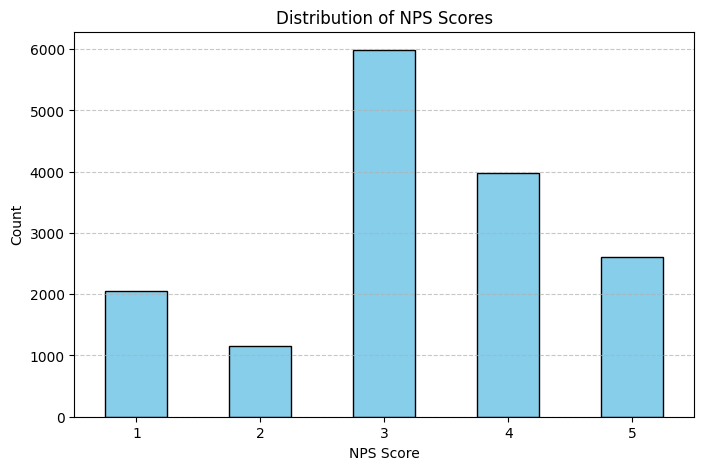

In [27]:


# Define the full range of NPS scores
nps_range = range(1, 6)

# Count occurrences, ensuring all values from 1 to 5 are included
nps_counts = df['nps'].value_counts().reindex(nps_range, fill_value=0)

# Plot the bar chart
plt.figure(figsize=(8, 5))
nps_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('NPS Score')
plt.ylabel('Count')
plt.title('Distribution of NPS Scores')
plt.xticks(rotation=0)  # Keep labels readable
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [28]:


# Calculate mean, median, and mode
mean_nps = df['nps'].mean()
median_nps = df['nps'].median()
mode_nps = stats.mode(df['nps'])[0]#[0]  # Extracting mode value

# Print the values
print(f"Mean NPS Score: {mean_nps}")
print(f"Median NPS Score: {median_nps}")
print(f"Mode NPS Score: {mode_nps}")


Mean NPS Score: 3.2495245340433625
Median NPS Score: 3.0
Mode NPS Score: 3


Correlation between NPS and CLTV: 0.06840632432648826


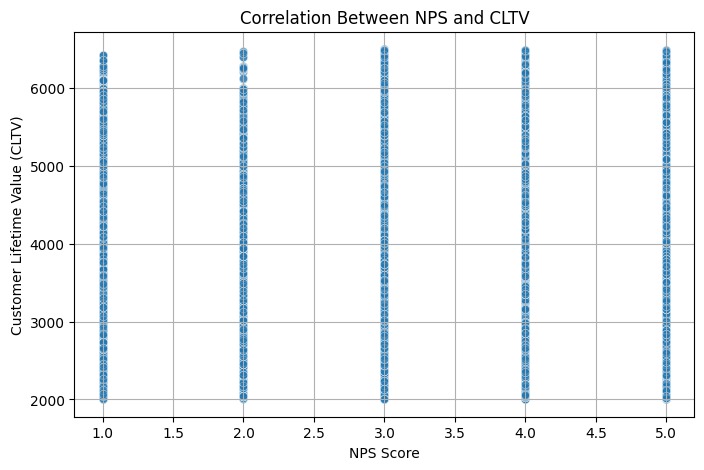

In [29]:


# Calculate correlation
correlation = df['nps'].corr(df['cltv'])

# Print correlation value
print(f"Correlation between NPS and CLTV: {correlation}")

# Visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['nps'], y=df['cltv'], alpha=0.6)
plt.xlabel('NPS Score')
plt.ylabel('Customer Lifetime Value (CLTV)')
plt.title('Correlation Between NPS and CLTV')
plt.grid(True)
plt.show()


In [30]:

feature1_insights = """
#####No Missing Values

The column contains no null values, ensuring completeness and reliability for analysis.

####Unique Value Distribution

The column has only 5 unique values, indicating a structured categorical variable.

####Most Frequent NPS Score

Visualization revealed that NPS = 3 has the highest number of occurrences, making it the most common rating among customers.

####Mean Score Trend

The mean NPS score is greater than 3, suggesting that customer responses tend to lean towards higher satisfaction levels.

####Correlation with CLTV

A correlation check found that NPS and CLTV have a relationship of 6.84%, indicating a weak but potentially significant link between satisfaction and customer lifetime value.
"""

In [31]:
# Do not modify this code
print_tile(size="h3", key='feature1_insights', value=feature1_insights)

### B.4 Explore Feature of Interest 2

> cltv'

Customer Lifetime Value. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

In [32]:
df.head()

,customer_id,nps,cltv,reason
0,70f18737-5835-4639-be44-f1a8c6604490,4,2056,NaN
1,206e8726-2743-4739-8f2f-758e30256314,3,2916,NaN
2,40da1c87-0650-4378-b8d7-0a49cb21085c,4,5248,NaN
3,4e28bb69-cee2-4fdf-8831-28935bb5e9b6,3,4607,NaN
4,39c9339b-c22b-4bf2-8c73-deb7b6e02de1,4,3030,NaN


In [33]:
df.cltv.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15774 entries, 0 to 15773
Series name: cltv
Non-Null Count  Dtype
--------------  -----
15774 non-null  int64
dtypes: int64(1)
memory usage: 123.4 KB


In [34]:
df.cltv.describe()

count    15774.000000
mean      4386.955750
std       1191.571121
min       2003.000000
25%       3424.000000
50%       4539.000000
75%       5362.750000
max       6500.000000
Name: cltv, dtype: float64

In [35]:

# Calculate mean, median, and mode
mean_cltv = df['cltv'].mean()
median_cltv = df['cltv'].median()
mode_cltv = stats.mode(df['cltv'])[0]#[0]  # Extracting mode value

# Print the values
print(f"Mean cltv Score: {mean_cltv}")
print(f"Median cltv Score: {median_cltv}")
print(f"Mode cltv Score: {mode_cltv}")

Mean cltv Score: 4386.955749968302
Median cltv Score: 4539.0
Mode cltv Score: 5651


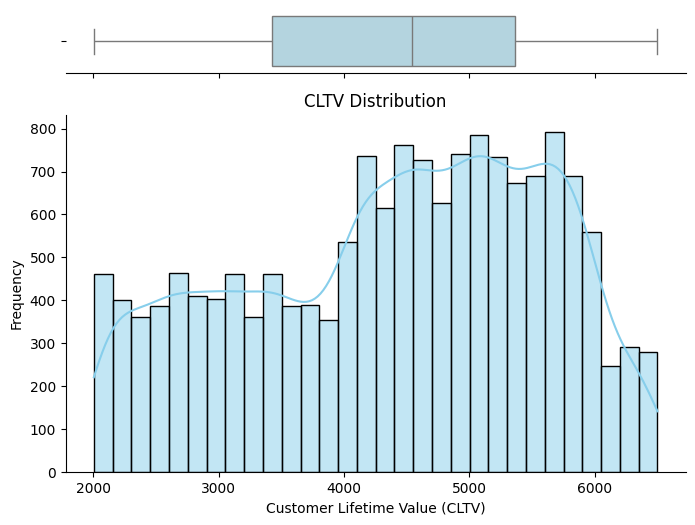

In [36]:

# Create a figure with two subplots
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 6))

# Boxplot
sns.boxplot(x=df['cltv'], ax=ax_box, color='lightblue')
ax_box.set(xlabel='')  # Remove x-axis label for boxplot

# Histogram
sns.histplot(df['cltv'], bins=30, kde=True, ax=ax_hist, color='skyblue')
ax_hist.set_xlabel('Customer Lifetime Value (CLTV)')
ax_hist.set_ylabel('Frequency')
ax_hist.set_title('CLTV Distribution')

# Remove unnecessary spines
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

# Show the plot
plt.show()


the distribution is slightly right skewed meaning cltv has moderate to high value customers

In [37]:

feature_2_insights = """Maximum CLTV Value:

The highest recorded Customer Lifetime Value (CLTV) is 6500, indicating the presence of high-value customers.

75th Percentile Analysis:

The 75th percentile is 5362, meaning that 25% of customers have a CLTV above this threshold, highlighting a valuable customer segment.

Mean CLTV Trend:

The average CLTV is 4386, suggesting that most customers fall within a mid-range value category.

Right-Skewed Distribution:

The CLTV data is slightly right-skewed, indicating that while most customers have moderate CLTV values, there are a few exceptionally high-value customers that increase the overall mean.
"""

In [38]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### B.5 Explore Feature of Interest n

> reason

Customer’s specific reason for leaving the company

In [39]:
df.head()

,customer_id,nps,cltv,reason
0,70f18737-5835-4639-be44-f1a8c6604490,4,2056,NaN
1,206e8726-2743-4739-8f2f-758e30256314,3,2916,NaN
2,40da1c87-0650-4378-b8d7-0a49cb21085c,4,5248,NaN
3,4e28bb69-cee2-4fdf-8831-28935bb5e9b6,3,4607,NaN
4,39c9339b-c22b-4bf2-8c73-deb7b6e02de1,4,3030,NaN


In [40]:
df.reason.nunique()

20

In [41]:
df.reason.unique()

array([nan, 'Competitor offered more data', 'Long distance charges',
       'Competitor offered higher download speeds',
       'Attitude of service provider', 'Network reliability',
       'Poor expertise of online support', 'Competitor made better offer',
       'Competitor had better devices', 'Attitude of support person',
       'Service dissatisfaction', 'Extra data charges',
       'Product dissatisfaction', 'Moved', "Don't know",
       'Limited range of services', 'Price too high',
       'Lack of self-service on Website',
       'Lack of affordable download/upload speed', 'Deceased',
       'Poor expertise of phone support'], dtype=object)

In [42]:
len(df.reason)

15774

In [43]:
df.reason.isnull().sum()

np.int64(11585)

In [44]:
non_nan_count = df['reason'].count()
non_nan_count

np.int64(4189)

In [45]:

# Count occurrences of each unique reason
reason_counts = df['reason'].value_counts()

# Print the frequency distribution
print(reason_counts)


reason
Competitor made better offer                 687
Competitor had better devices                667
Attitude of support person                   516
Don't know                                   306
Competitor offered more data                 267
Attitude of service provider                 220
Product dissatisfaction                      208
Competitor offered higher download speeds    207
Network reliability                          177
Price too high                               169
Long distance charges                        142
Service dissatisfaction                      114
Moved                                         88
Poor expertise of online support              85
Extra data charges                            84
Limited range of services                     84
Lack of self-service on Website               67
Lack of affordable download/upload speed      63
Poor expertise of phone support               23
Deceased                                      15
Name: count, 

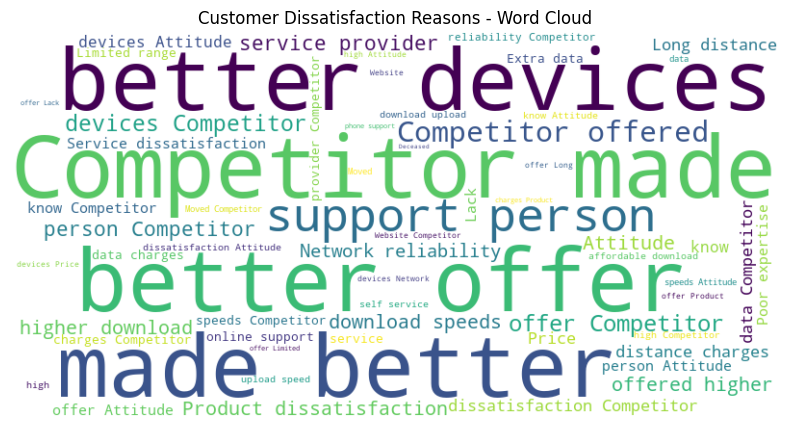

In [46]:


# Combine all text from the 'reason' column into a single string
text = ' '.join(df['reason'].dropna().astype(str))

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Customer Dissatisfaction Reasons - Word Cloud")
plt.show()


In [47]:

feature_n_insights = """
####Missing Values Analysis
The columns has 11.5k mssising values which will be addressed in the cleaning phase.

####Unique Value Count

The columns has 20 unique values which tell us feedback is consistent

#####Top Reasons for Customer Dissatisfaction

- The most frequently cited reasons for dissatisfaction include:

- Better deals offered by competitors → Customers may switch due to attractive pricing or promotions.

- Better devices provided by competitors → Device features and availability play a crucial role in customer choices.

- Download speed concerns → Slow or unreliable internet speed impacts customer experience.

- Support personnel issues → Poor interactions with customer service can lead to churn.
"""

In [48]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

---
## C. Data Cleaning

### C.1 Copy Dataset

In [49]:
# Do not modify this code
df_clean = df.copy()
try:
  df_clean = df.copy()
except Exception as e:
  print(e)

### C.2 Fixing "removing duplicates"

> Provide some explanations on why you believe it is important to fix this issue and its impacts

> Improves data accuracy – Prevents extreme values from distorting statistical analysis.

> Enhances model performance – Leads to more reliable and robust predictive models.

> Removes bias – Ensures insights are not skewed by anomalies.

> Improves visualization clarity – Makes trends easier to interpret without misleading spikes.

> Supports better decision-making – Helps businesses focus on patterns that truly matter.

In [50]:


df_clean_duplicates = df_clean[df_clean.duplicated(subset=['customer_id'], keep=False)]


# Display duplicate rows
df_clean_duplicates.head()# Sorting duplicate rows by 'customer_id' as an object (string)
df_clean_duplicates_sorted = df_clean_duplicates.sort_values(by='customer_id', key=lambda x: x.astype(str))

# Display the sorted duplicate rows
df_clean_duplicates_sorted.head()


,customer_id,nps,cltv,reason
1557,000f51ad-8208-46f4-a213-6b83de3dded1,4,3733,NaN
3192,000f51ad-8208-46f4-a213-6b83de3dded1,4,3733,NaN
13235,000f51ad-8208-46f4-a213-6b83de3dded1,4,3733,NaN
8165,001a6be8-e23e-47e1-8384-18051f2d03b5,5,4152,NaN
8208,001a6be8-e23e-47e1-8384-18051f2d03b5,5,4152,NaN


In [51]:
prev=df_clean.shape[0]
prev

15774

In [52]:

df_clean = df_clean.drop_duplicates(keep='first', ignore_index=True)


In [53]:
current=df_clean.shape[0]
current


7043

number duplicate values removed

In [54]:
prev-current

8731

In [55]:


df_clean_duplicates = df_clean[df_clean.duplicated(subset=['customer_id'], keep=False)]


# Display duplicate rows
df_clean_duplicates.head()# Sorting duplicate rows by 'customer_id' as an object (string)
df_clean_duplicates_sorted = df_clean_duplicates.sort_values(by='customer_id', key=lambda x: x.astype(str))

# Display the sorted duplicate rows
df_clean_duplicates_sorted.head()


,customer_id,nps,cltv,reason


In [56]:

data_cleaning_1_explanations = """
Identified and removed approximately 7,000 duplicate records based on customer_id, ensuring data integrity.

Kept only the first occurrence of each duplicate to maintain relevant customer information while eliminating redundancy.
"""

In [57]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

---
## D. Feature Engineering

### D.1 Copy Datasets

In [58]:
# Do not modify this code
try:
  df_eng = df_clean.copy()
except Exception as e:
  print(e)

### D.2 New Feature "nps category>"

> Converts raw NPS scores into meaningful categories (Promoters, Passives, Detractors).

> Helps businesses identify customer satisfaction trends efficiently.
> Allows targeted actions based on customer sentiment.

> we can focus on identifying and converting Passives & retaining Promoters.

In [59]:


# Convert NPS score into categorical labels
def categorize_nps(score):
    if score >= 4:
        return 'Promoter'
    elif score == 3:
        return 'Passive'
    else:
        return 'Detractor'

# Apply function to create a new column
df_eng['nps_category'] = df_eng['nps'].apply(categorize_nps)

# Display the first few rows with new classification
print(df_eng[['nps', 'nps_category']].head())


   nps nps_category
0    4     Promoter
1    3      Passive
2    4     Promoter
3    3      Passive
4    4     Promoter


In [60]:
df_eng.head()

,customer_id,nps,cltv,reason,nps_category
0,70f18737-5835-4639-be44-f1a8c6604490,4,2056,NaN,Promoter
1,206e8726-2743-4739-8f2f-758e30256314,3,2916,NaN,Passive
2,40da1c87-0650-4378-b8d7-0a49cb21085c,4,5248,NaN,Promoter
3,4e28bb69-cee2-4fdf-8831-28935bb5e9b6,3,4607,NaN,Passive
4,39c9339b-c22b-4bf2-8c73-deb7b6e02de1,4,3030,NaN,Promoter


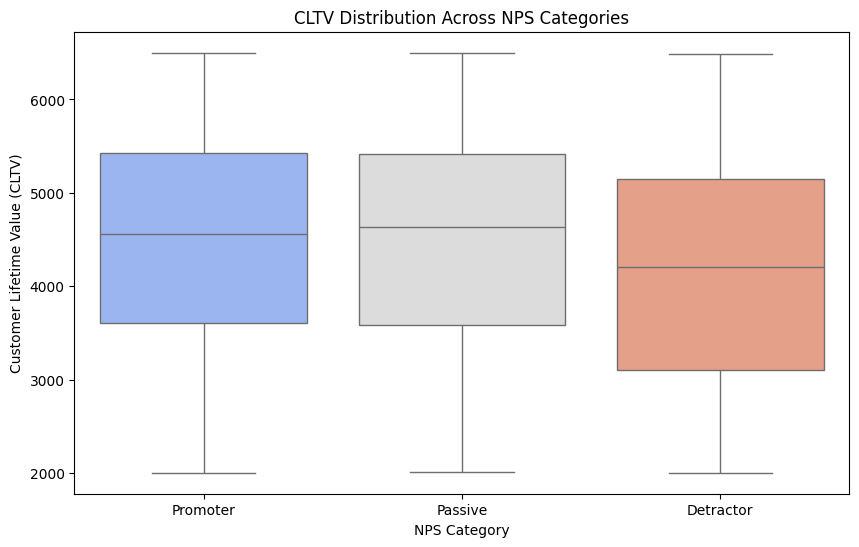

In [61]:


# Plot boxplot to visualize CLTV distribution across NPS categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='nps_category', y='cltv', data=df_eng, palette='coolwarm')

plt.xlabel("NPS Category")
plt.ylabel("Customer Lifetime Value (CLTV)")
plt.title("CLTV Distribution Across NPS Categories")
plt.show()


Customers with higher NPS (Promoters) tend to have higher lifetime value (CLTV).

In [62]:

feature_engineering_1_explanations = """
Converts raw NPS scores into meaningful categories (Promoters, Passives, Detractors).

Helps businesses identify customer satisfaction trends efficiently.


Allows targeted actions based on customer sentiment.

Businesses can focus on converting Passives & retaining Promoters.
Customers with higher NPS (Promoters) tend to have higher lifetime value (CLTV).
"""

In [63]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### D.3 New Feature "avg cltv for each nps category>"

> Enables businesses to identify high-value loyal customers (Promoters with high CLTV) and potential churn risks (Detractors with low CLTV).
> Businesses can prioritize high-CLTV Promoters for loyalty programs and exclusive offers.
> Helps classify customers based on both satisfaction (NPS) and lifetime value (CLTV).



While most customers have CLTV below 5500, a few high-value customers (above 6000) pull the mean higher.

This implies a small group of top spenders significantly impacting revenue.

In [64]:

# Calculate the average CLTV for each NPS category
avg_cltv_per_nps = df_eng.groupby('nps_category')['cltv'].mean().reset_index()

# Merge back into the original DataFrame
df_eng = df_eng.merge(avg_cltv_per_nps, on='nps_category', suffixes=('', '_avg'))

# Rename column for clarity
df_eng.rename(columns={'cltv_avg': 'avg_cltv_for_nps_category'}, inplace=True)

# Display the first few rows
print(df_eng[['nps_category', 'cltv', 'avg_cltv_for_nps_category']].head())

  nps_category  cltv  avg_cltv_for_nps_category
0     Promoter  2056                4462.120830
1      Passive  2916                4473.402627
2     Promoter  5248                4462.120830
3      Passive  4607                4473.402627
4     Promoter  3030                4462.120830


In [65]:
df_eng.head()

,customer_id,nps,cltv,reason,nps_category,avg_cltv_for_nps_category
0,70f18737-5835-4639-be44-f1a8c6604490,4,2056,NaN,Promoter,4462.120830
1,206e8726-2743-4739-8f2f-758e30256314,3,2916,NaN,Passive,4473.402627
2,40da1c87-0650-4378-b8d7-0a49cb21085c,4,5248,NaN,Promoter,4462.120830
3,4e28bb69-cee2-4fdf-8831-28935bb5e9b6,3,4607,NaN,Passive,4473.402627
4,39c9339b-c22b-4bf2-8c73-deb7b6e02de1,4,3030,NaN,Promoter,4462.120830


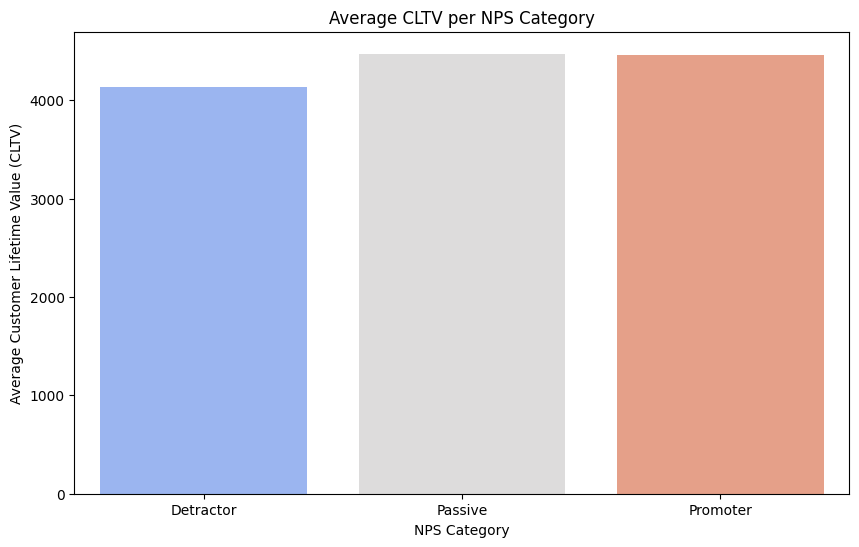

In [66]:


# Calculate average CLTV per NPS category
avg_cltv_per_nps = df_eng.groupby('nps_category')['cltv'].mean().reset_index()

# Rename column for clarity
avg_cltv_per_nps.columns = ['nps_category', 'avg_cltv_for_nps_category']

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='nps_category', y='avg_cltv_for_nps_category', data=avg_cltv_per_nps, palette='coolwarm')

plt.xlabel("NPS Category")
plt.ylabel("Average Customer Lifetime Value (CLTV)")
plt.title("Average CLTV per NPS Category")
plt.show()


In [67]:
avg_cltv_per_nps

,nps_category,avg_cltv_for_nps_category
0,Detractor,4138.856944
1,Passive,4473.402627
2,Promoter,4462.120830


In [68]:

feature_engineering_2_explanations = """
####Majority of Customers Have CLTV Between 4000 and 5500

 suggesting most customers provide moderate lifetime value to the business.



"""

In [69]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### D.4 New Feature "cltv_percentile_rank"

> Converts raw CLTV values into percentile ranks, making it easier to compare customer value across different groups.

> High CLTV percentile customers can be prioritized for loyalty programs, while lower percentile customers can be engaged with incentives to increase spending.



In [70]:

# Calculate CLTV percentile rank
df_eng['cltv_percentile_rank'] = df_eng['cltv'].rank(pct=True)

# Display top spenders (sorted by CLTV)
df_eng_sorted = df_eng.sort_values(by='cltv', ascending=False)

# Show first few rows
print(df_eng_sorted[['customer_id', 'cltv', 'cltv_percentile_rank']].head())


                               customer_id  cltv  cltv_percentile_rank
241   864b72fa-0026-46fd-bc6a-12931814e97e  6500              1.000000
4724  589cedfc-893b-4b9c-b4d9-c6a93b3be332  6499              0.999787
6538  7159c630-009e-454a-bdcd-41fe24818988  6499              0.999787
663   c9e31aaa-d400-45f7-96fc-c51a5bf8f386  6495              0.999574
5502  5af515ae-cc08-4ffb-b268-389ff20f966e  6494              0.999361


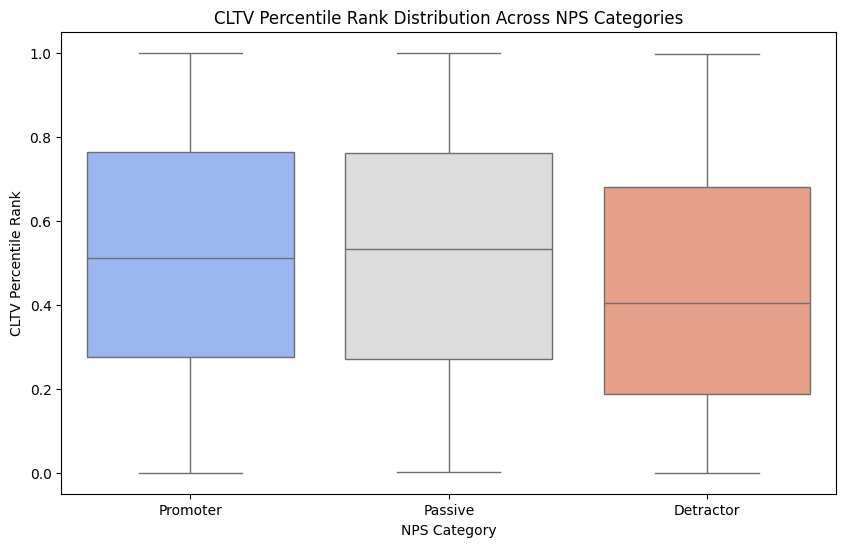

In [71]:


# Plot boxplot to visualize CLTV percentile rank across NPS categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='nps_category', y='cltv_percentile_rank', data=df_eng, palette='coolwarm')

plt.xlabel("NPS Category")
plt.ylabel("CLTV Percentile Rank")
plt.title("CLTV Percentile Rank Distribution Across NPS Categories")
plt.show()


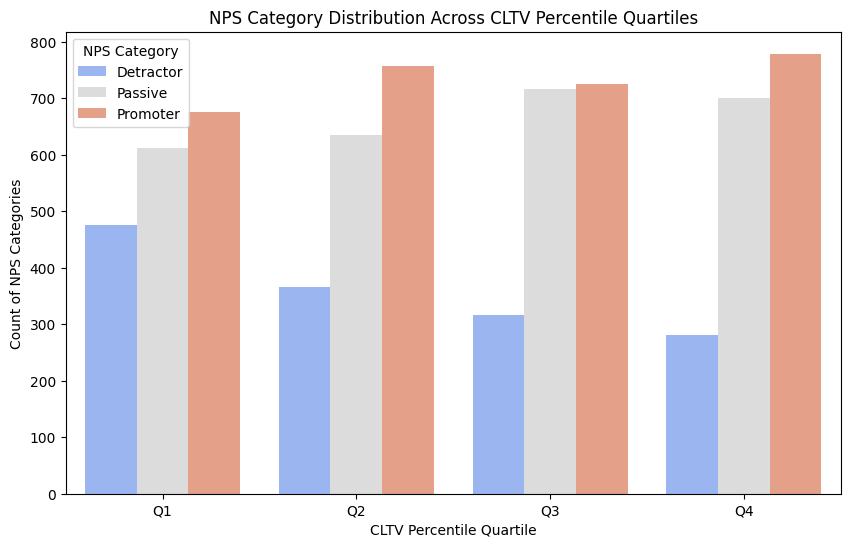

In [72]:


# Define quartiles for CLTV percentile rank
df_eng['cltv_quartile'] = pd.qcut(df_eng['cltv_percentile_rank'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Count occurrences of NPS categories within each quartile
nps_distribution = df_eng.groupby(['cltv_quartile', 'nps_category']).size().reset_index(name='count')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='cltv_quartile', y='count', hue='nps_category', data=nps_distribution, palette='coolwarm')

plt.xlabel("CLTV Percentile Quartile")
plt.ylabel("Count of NPS Categories")
plt.title("NPS Category Distribution Across CLTV Percentile Quartiles")
plt.legend(title="NPS Category")
plt.show()


we can clearly see that the passive and promoters outweight the detractors by alot in the q2,q3,and q4

In [73]:

feature_engineering_3_explanations = """

#### Standardizes CLTV Comparison

Converts raw CLTV values into percentile ranks, making it easier to compare customers across different value segments.

Helps businesses identify top spenders efficiently without relying on absolute CLTV values.

#### Optimizes Loyalty & Retention Strategies

High CLTV percentile customers can be prioritized for exclusive loyalty programs and special offers to enhance engagement.

Lower CLTV percentile customers can be targeted with incentives to increase spending and improve retention.

#### NPS Category Trends Across CLTV Quartiles

We can clearly observe that Passives and Promoters significantly outnumber Detractors in Q2, Q3, and Q4 of CLTV percentile rank.

This suggests that higher CLTV customers tend to have better satisfaction scores, reinforcing the connection between customer experience and long-term revenue potential.
"""

In [74]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

---
## E. Save Datasets

In [75]:
try:
  df_eng.to_csv("../data/processed/df_eng_customer_satisfaction.csv", index=False)

except Exception as e:
  print(e)